In [1]:
%matplotlib inline

# Pandas and DataFrames

Often, we have tables of data--collections of named columns arranged in rows.  The **Pandas** package gives us a **DataFrame()** class that lets us index these columns the same way as with dicts, while still getting the benefit of Numpy arrays, meaning we can still write vectorized code.  

Let's start playing with the analysis now.  We'll examine Pandas in more depth in the coming days.

In [2]:
import pandas as pd

Please open the file “MentalRotationData.csv” and use it to answer the following questions about the results of the Mental Rotation psychology experiment. If you reach the end of the exercises, explore the dataset and DataFrames more and see what you can find about this experiment!

In [3]:
df = pd.read_csv('MentalRotation.csv')
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


## Examining the Dataset

**head()**, **tail()**, **sample()**

Look at the first 5 lines of the dataset

In [4]:
df.head(5)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


In [5]:
df.iloc[:5]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M


In [6]:
df.loc[:5]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
0,49,1,0,0,n,3107,1,32,M
1,49,2,150,0,n,2930,1,32,M
2,49,3,150,1,b,1874,1,32,M
3,49,4,100,1,b,3793,1,32,M
4,49,5,50,1,b,2184,1,32,M
5,49,6,50,0,n,1749,1,32,M


Look at the last 5 lines of the dataset

In [7]:
df.tail()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


In [8]:
df.iloc[-5:]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


In [9]:
df.iloc[-5:]

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
5066,33,92,150,1,b,2095,1,20,F
5067,33,93,150,0,n,2125,1,20,F
5068,33,94,50,0,n,1226,1,20,F
5069,33,95,100,1,b,2783,1,20,F
5070,33,96,0,0,n,1017,1,20,F


Check 3 random lines in the dataset.

In [10]:
df.sample(3)

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex
2734,20,6,50,0,n,1743,1,19,M
1032,44,89,100,0,n,5161,1,18,M
334,11,52,0,0,n,1740,1,21,M


How Many Total Trials (rows) are in the study?

In [11]:
len(df)

5071

In [12]:
df.count()

Subject     5071
Trial       5071
Angle       5071
Matching    5071
Response    5071
Time        5071
Correct     5071
Age         5071
Sex         5071
dtype: int64

In [13]:
df.shape

(5071, 9)

In [14]:
df.last_valid_index() + 1

5071

What is the maximum number of trials that one subject performed?

In [15]:
df['Trial'].max()

96

In [16]:
max(df['Trial'])

96

In [17]:
df['Trial'].count()

5071

In [18]:
subjects = df.groupby('Subject')
subjects['Trial'].count().max()

96

In [19]:
df.groupby('Subject')['Trial'].count().max()

96

In [20]:
df.groupby(['Subject', 'Matching'])[['Trial']].count().head()

Trial
Subject Matching       
1       0            48
        1            48
2       0            47
        1            46
3       0            47

### Making New Columns

Convert the Time column to seconds by dividing it by 1000.

In [21]:
df['TimeSecs'] = df['Time'] / 1000
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs
0,49,1,0,0,n,3107,1,32,M,3.107
1,49,2,150,0,n,2930,1,32,M,2.930
2,49,3,150,1,b,1874,1,32,M,1.874
3,49,4,100,1,b,3793,1,32,M,3.793
4,49,5,50,1,b,2184,1,32,M,2.184


Change the "Correct" column to *bool* (True/False) using the **astype()** method

In [22]:
df['isCorrect'] = df['Correct'].astype(bool)
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs,isCorrect
0,49,1,0,0,n,3107,1,32,M,3.107,True
1,49,2,150,0,n,2930,1,32,M,2.930,True
2,49,3,150,1,b,1874,1,32,M,1.874,True
3,49,4,100,1,b,3793,1,32,M,3.793,True
4,49,5,50,1,b,2184,1,32,M,2.184,True


### The mean() method

What is the mean response time, across all trials?

In [23]:
df['TimeSecs'].mean()

2.732093275488068

In [24]:
import numpy as np
np.mean(df['TimeSecs'])

2.732093275488068

What percent of trials were answered correctly?

In [25]:
sum(df['isCorrect']) / len(df['isCorrect'])

0.9045553145336226

In [26]:
df['isCorrect'].mean()

0.9045553145336226

In [27]:
df['Correct'].mean()

0.9045553145336226

What percent of trials were “Matching” trials?

In [28]:
df['Matching'].mean()

0.5006901991717609

### Slicing

Is there a difference in accuracy between matching and non-matching trials?

In [29]:
matching = df[df['Matching'] == 1]
not_matching = df[df['Matching'] == 0]


print(f"Matching Acc.: {not_matching['isCorrect'].mean():.2%} NotMatching Acc.: {matching['isCorrect'].mean():.3%}")

Matching Acc.: 90.92% NotMatching Acc.: 89.996%


In [30]:
df.pivot(columns='Matching', values='Correct').mean()

Matching
0    0.909163
1    0.899961
dtype: float64

In [31]:
df.groupby('Matching')['Correct'].mean()

Matching
0    0.909163
1    0.899961
Name: Correct, dtype: float64

Is there a response time difference between matching and nonmatching
trials?

In [32]:
df.groupby('Matching')['Time'].mean()

Matching
0    2842.533175
1    2621.957857
Name: Time, dtype: float64

In [33]:
df['isMatching'] = df['Matching'].astype(bool)
df.head()

,Subject,Trial,Angle,Matching,Response,Time,Correct,Age,Sex,TimeSecs,isCorrect,isMatching
0,49,1,0,0,n,3107,1,32,M,3.107,True,False
1,49,2,150,0,n,2930,1,32,M,2.930,True,False
2,49,3,150,1,b,1874,1,32,M,1.874,True,True
3,49,4,100,1,b,3793,1,32,M,3.793,True,True
4,49,5,50,1,b,2184,1,32,M,2.184,True,True


In [34]:
from scipy import stats
g = df.groupby('isMatching')['Time']
stats.ttest_ind(g.get_group(True), g.get_group(False))

Ttest_indResult(statistic=-5.571026559512823, pvalue=2.6631382031258402e-08)

Is there a response time difference between matching and nonmatching trials, for different rotation Angles?

In [35]:
groups = df.groupby(['Matching', 'Angle'])
groups[['TimeSecs']].mean()

TimeSecs
Matching Angle          
0        0      2.350322
         50     2.616078
         100    3.169240
         150    3.244274
1        0      1.554967
         50     2.508193
         100    3.107849
         150    3.332629

### Plotting

Plot the response time distribution as a histogram.

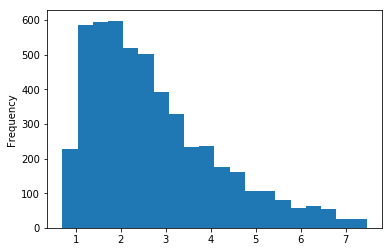

In [36]:
df['TimeSecs'].plot.hist(bins=20);

Is there a correlation between Angle of mental rotation and response time?  Visualize the relationship

In [37]:
meanTimes = df.groupby('Angle')['TimeSecs'].mean()
meanTimes

Angle
0      1.952644
50     2.561967
100    3.138325
150    3.288240
Name: TimeSecs, dtype: float64

In [45]:
!pip install seaborn

In [38]:
import seaborn as sns

In [53]:
import matplotlib
matplotlib.style.use('ggplot')

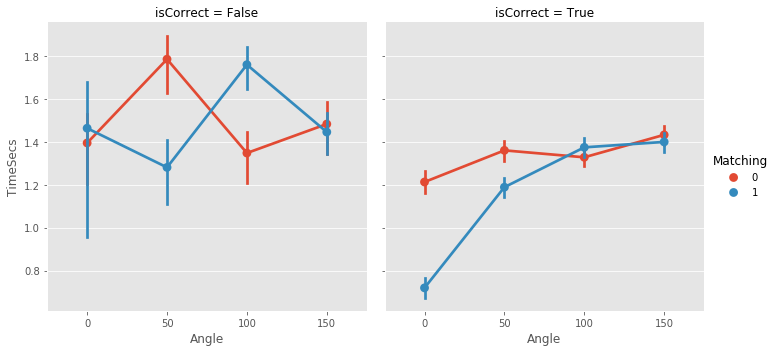

In [78]:
sns.catplot(x='Angle', y='TimeSecs', data=df, kind='point', hue='Matching', col='isCorrect', 
            estimator=np.std, ci=68, )

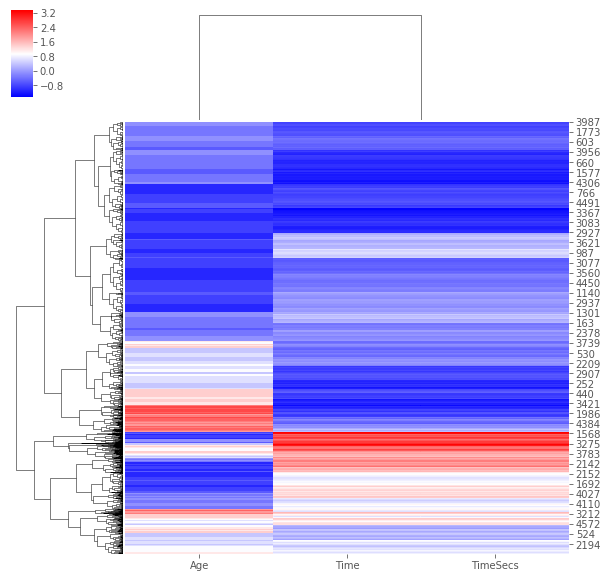

In [58]:
df_new = df[['Time', 'Age', 'TimeSecs']]
sns.clustermap(data=df_new, z_score=1, cmap='bwr')

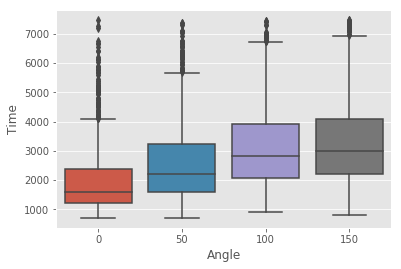

In [66]:
sns.boxplot(x='Angle', y='Time', data=df)

/home/nickdg/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


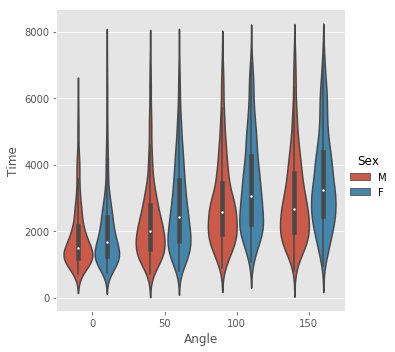

In [59]:
sns.factorplot(x='Angle', y='Time', data=df, kind='violin', hue='Sex')

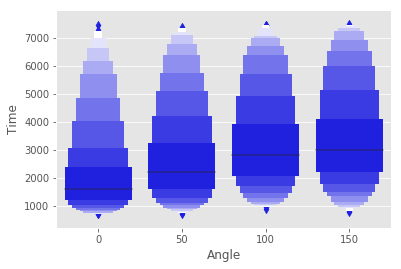

In [63]:
sns.boxenplot(x='Angle', y='Time', color='b', scale='linear', data=df)

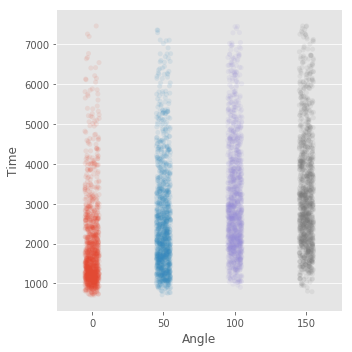

In [69]:
sns.catplot(x='Angle', y='Time', data=df, alpha=.1)

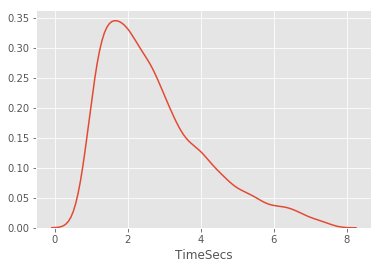

In [71]:
sns.distplot(df['TimeSecs'], hist=False)

In [72]:
import matplotlib.pyplot as plt
plt.